In [17]:
import pandas as pd
import matplotlib 
from matplotlib import pyplot as plt
import numpy as np
import csv
import glob
import gzip
import shutil

def Read_Data(WeekNumber, Year):
      columns=["Mode", "Date", "DateTime", "CardID", "CardType", "VehicleID",
                   "ParentRoute", "RouteID", "StopID"] 
      fname = glob.glob(Year + '/Week%s' %WeekNumber + "/*.txt")
      print(fname)
      dataset = pd.read_csv(fname[0], sep="|", names=columns)
      return dataset

    
def Append_data(Year, FirstWeek, LastWeek):
    basic_table = Read_Data(FirstWeek, Year)
    for i in range(FirstWeek+1, LastWeek+1):
          Actual_Table    = Read_Data(i, Year)
          basic_table     = basic_table.append(Actual_Table) 
          print('appended', len(basic_table))
    return basic_table   
    
# we only read in weeks 28 - 52 for all datasets, so they are consistent 
dataset_2015 = Append_data("2015", 28,52)#52
dataset_2016 = Append_data("2016", 28,52)
dataset_2017 = Append_data("2017", 28,52)


['2015/Week28/file28.txt']
['2015/Week29/file29.txt']
appended 1253313
['2015/Week30/file30.txt']
appended 1954933
['2016/Week28/file28.txt']
['2016/Week29/file29.txt']
appended 1272475
['2016/Week30/file30.txt']
appended 1969697
['2017/Week28/file28.txt']
['2017/Week29/file29.txt']
appended 1347648
['2017/Week30/file30.txt']
appended 2087596


In [15]:
def group(mydata):  
    # how many touch-ons belong to each CardID
    mydata_touchOns = mydata.groupby("CardID").DateTime.count().reset_index()
    return mydata_touchOns
    
dataset_2015_grouped = group(dataset_2015)
dataset_2016_grouped = group(dataset_2016)
dataset_2017_grouped = group(dataset_2017)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


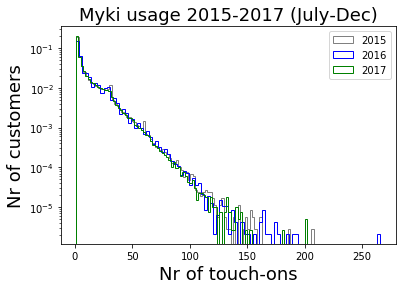

In [16]:
plt.hist(dataset_2015_grouped.DateTime, bins=100, label='2015', color = 'grey', normed = True, histtype = 'step')
plt.hist(dataset_2016_grouped.DateTime, bins=100,label='2016', color = 'blue', normed = True, histtype = 'step')
plt.hist(dataset_2017_grouped.DateTime, bins=100, label='2017', color = 'green', normed = True, histtype = 'step')

plt.title('Myki usage 2015-2017 (July-Dec)',fontsize=18)
plt.xlabel('Nr of touch-ons',fontsize=18)
plt.legend()
plt.yscale('log')
plt.ylabel('Nr of customers',fontsize=18)
#plt.savefig("MykiUsage_2015_2017.png")
plt.show()